In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pythia8

In [10]:
pythia = pythia8.Pythia()
pythia.readString("Beams:eCM = 5020.") # center-of-mass energy = 5.02 TeV
pythia.readString("HardQCD:all = on") # allow all hard QCD processes (quark/gluon scattering)
pythia.readString("Beams:idA =  2212") # set beam A to proton
pythia.readString("Beams:idB = 2212") # set beam B to proton
pythia.readString("Tune:pp = 14") # set the Pythia tune to 14 (google Pythia tune for more info)
pythia.readString("Main:numberOfEvents = 10000") # generate 10,000 events
pythia.readString("PhaseSpace:pTHatMin = 20.") # set the minimum pT of the hard process to 20 GeV
pythia.init()

True

In [32]:
def PrintEvent(event):
    '''
    Prints multiplicity of final state particles in an event
    and their PDG code, name, energy, pseudorapidity, and azimuthal angle
    '''
    print("Total particles in event: %d" % event.size())
    print("---------------------------------------------------")
    print("PDG\tName\tE(GeV)\teta\tphi")
    print("---------------------------------------------------")
    for particle in event:
        if particle.isFinal():
            print("%d\t%s\t%.3f\t%.3f\t%.3f" % (particle.id(), particle.name(), particle.e(), particle.eta(), particle.phi()))
            

pythia.next() # generate the next event        
PrintEvent(pythia.event) # print the event

Total particles in event: 622
---------------------------------------------------
PDG	Name	E(GeV)	eta	phi
---------------------------------------------------
211	pi+	61.819	-6.281	3.052
-211	pi-	1.517	-2.553	-0.491
211	pi+	0.459	0.525	-1.639
211	pi+	1.063	0.963	2.398
-211	pi-	1.018	1.007	2.113
211	pi+	0.400	0.123	2.508
-211	pi-	0.576	1.381	-0.022
2112	n0	13.223	-3.984	-1.974
-2112	nbar0	5.475	-1.848	1.127
211	pi+	4.271	2.255	2.906
-211	pi-	5.046	1.711	-2.426
211	pi+	1.963	2.859	-0.747
-211	pi-	47.204	3.298	-0.493
211	pi+	35.182	4.065	2.405
-211	pi-	25.015	3.844	2.359
211	pi+	10.400	5.395	0.636
-211	pi-	52.259	6.940	1.214
211	pi+	0.533	-0.833	-2.691
-2212	pbar-	15.425	3.481	-1.619
2212	p+	33.039	5.517	-1.936
-211	pi-	14.500	-3.472	2.579
321	K+	74.392	-4.817	0.529
-211	pi-	20.067	-4.811	1.705
-2212	pbar-	38.894	-5.241	-1.125
211	pi+	9.921	-4.673	-0.683
211	pi+	46.613	-4.452	-1.687
-2112	nbar0	28.226	-4.080	-1.983
211	pi+	1.587	-1.791	1.214
321	K+	1.705	-1.052	0.308
-2112	nbar0	1.800	-0.9

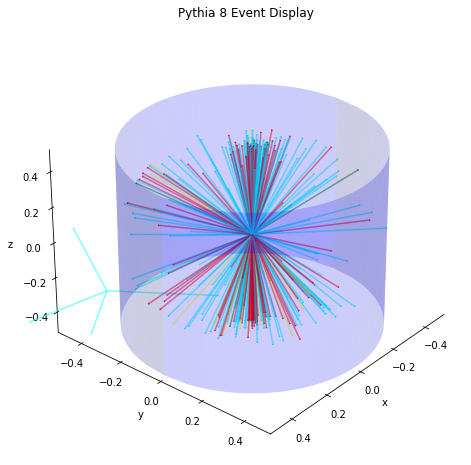

In [88]:
def EventDisplay(event):
    '''
    Takes particle pseudorapidity and azimuthal angle, pz, and energy and plots
    in a 3D cylindrical detector display
    '''
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(45, 45)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    colors = ['red','yellow','green','cyan']
    
    for particle in event:
        if not particle.isFinal():
            continue
        vtx = np.array([particle.xProd(), particle.yProd(), particle.zProd()])
        # vtx_final = np.array([particle.xDec(), particle.yDec(), particle.zDec()])
        p = np.array([particle.pT()*np.cos(particle.phi()), particle.pT()*np.sin(particle.phi()), particle.pz()])
        # if np.abs(particle.eta()) < 1.0:
            # continue
        if np.abs(particle.id()) == 211:
            color = colors[0]
        elif np.abs(particle.id()) == 321:
            color = colors[1]
        elif np.abs(particle.id()) == 2212:
            color = colors[2]
        else:
            color = colors[3]
        ax.quiver(vtx[0], vtx[1], vtx[2], p[0], p[1], p[2], normalize=True, color=color, length=0.5, arrow_length_ratio=0.01, alpha=0.5)

    ax.set_title('Pythia 8 Event Display')
    x = np.linspace(-0.5, 0.5, 100)
    z = np.linspace(-0.5, 0.5, 100)
    Xc, Zc = np.meshgrid(x, z)
    Yc = np.sqrt(0.5**2-Xc**2)
    ax.plot_surface(Xc, Yc, Zc, alpha=0.2, color='blue')
    ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, color='blue')
    ax.elev = 30
    ax.azim = 40
    
    # make axis invisible
    for axis in (ax.w_xaxis, ax.w_yaxis, ax.w_zaxis):
        axis.pane.set_visible(False)
        axis.gridlines.set_visible(False)

    # rotate the axes and update
    # save as animated gif
    
    # for angle in range(0, 360):
    #     ax.view_init(30, angle)
    #     plt.draw()
    #     plt.pause(.001)
    #     ax.set_title('Pythia 8 Event Display')
    #     ax.set_xlabel('x')
    #     ax.set_ylabel('y')
    #     ax.set_zlabel('z')
    #     ax.set_xlim(-0.5, 0.5)
        
                
    plt.show()
    
EventDisplay(pythia.event)

In [41]:
pythia.next()
for particle in pythia.event:
    if particle.isFinal():
        print(particle.id(), particle.name(), particle.e(), particle.eta(), particle.phi(), particle.pT())

-211 pi- 4.820670082123854 2.467574006717368 1.476084974461135 0.8113166481265605
2112 n0 253.70639464747867 5.998082954215727 -2.879232182747045 1.2601476200140973
-211 pi- 1.857975108895149 3.266290006879645 -0.9085055135087757 0.14114899771038017
211 pi+ 7.267819518276881 3.4417898857634546 2.1872285763488475 0.46468535391461935
-321 K- 7.015741337815089 3.113428966180129 -2.1583128537484235 0.6209026081411348
321 K+ 2.9151073935590563 0.8120762958322052 -0.8961636291420352 2.130898451545302
-211 pi- 3.4212469550365325 0.573164093059183 -1.0457838985087693 2.9246959322498935
211 pi+ 1.5647914712172333 1.4342435865167018 -0.2148691836462099 0.7028803593607418
-211 pi- 0.5865776585989416 2.5288671418558324 -0.4068821561887735 0.09029704891863997
211 pi+ 13.633972764419052 5.604415997693918 -1.0566934757397717 0.1003822283580746
211 pi+ 2.2473621142500315 2.639791109197675 -1.377139280829881 0.3185739667267736
-211 pi- 1.696609513131463 1.5865631789218269 -2.8239369427797416 0.66418211

In [ ]:
# conda install -c conda-forge pythia8
# conda install -c conda-forge tensorflow
# conda install -c anaconda ipykernel
# conda install pip 

# pip install tensorflow==2.13.*
# conda install pytorch torchvision torchaudio cpuonly -c pytorch
# pip install -U scikit-learn

# conda env export > environment.yml

# python -m ipykernel install --user --name=firstEnv